# Data Visualization Checkpoint

Let's practice what we have learned so far and visualize some data!

## 1. Preprocessing phase :

In this phase, we will import the dataset using Pandas and show the head of the dataset then some general information about the data columns and values.

As a next step, we will apply what we have learned in the course to preprocess the data : find missing information, replace it with the appropriate values and verify that your data is ready to be treated.

In [1]:
# First of all, we need to import the Python pandas library
import pandas as pd

In [2]:
# We read the dataset through the read_csv() function
df = pd.read_csv("titanic-passengers.csv",sep = ";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


### General information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


This dataset has 891 examples and 12 columns (11 features + the target variable : Survived). 2 of the columns are floats, 4 are integers and 6 are objects.

Columns descriptions :
- PassengerId: a unique Id of a passenger
- Survived: reported if a passenger lived or died
- Pclass: ticket class
- Name: name of passenger
- Sex: passenger sex
- Age: age in years
- Sibsp: number of siblings or spouses aboard the Titanic
- Parch: number of parents or children aboard the Titanic
- Ticket: ticket number
- Fare: ticket fare
- Cabin: cabin number
- Embarked: port of Embarkation : Southampton, Cherbourg, and Queenstown

Some columns have missing values : Age, Cabin, Embarked

In [4]:
# Descriptive statistics about the data
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that the passenger ages range from 0.42 to 80

### Find missing information

In [5]:
# Counting missing values per variable (Feature)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Counting all the missing values
df.isnull().sum().sum()

866

In [7]:
# Representing missing values by percentages
total = df.isnull().sum().sort_values(ascending = False)
percent1 = df.isnull().sum()/df.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent2], axis = 1, keys = ['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


Columns with missing values : Age, Cabin, Embarked

- The "Embarked" column has only 2 missing values, which can easily be filled.
- It will be much more difficult to deal with the "Age" column, which has 177 missing values.
- It looks like that we might want to drop the "Cabin" column from the dataset, since 77 % of it are missing.

### Replace missing values (Numercial / Categorical)

In [8]:
# Replacing the missing values in the "Age" column with the mean
df["Age"].fillna(df["Age"].mean(), inplace = True)

#### Numerical data

In [9]:
# Replacing the missing values in the "Age" column with the mean
df["Age"].fillna(df["Age"].mean(), inplace = True)

In [10]:
# Checking
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Counting the different values of the "Cabin" column
df["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [12]:
# Replacing the missing values in the "Cabin" column with the mode i.e. in this case we choose "G6"
df["Cabin"].fillna("G6", inplace = True)

In [13]:
# Checking
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [14]:
# Counting the different values of the "Embarked" column
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# Replacing the missing values in the "Embarked" column with the mode i.e "S"
df["Embarked"].fillna("S", inplace = True)

# Or we can drop the rows with the "Embarked" missing values
#df.dropna(how = "any", inplace = True)

In [16]:
# Checking
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
# Checking that there are no more missing values
df.isnull().sum().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


## 2. Visualization phase :

We start by studying the distribution of the most important features based on our understanding of the dataset and the problem.

In [19]:
# We need to import the Python Matplotlib and Seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Age distribution

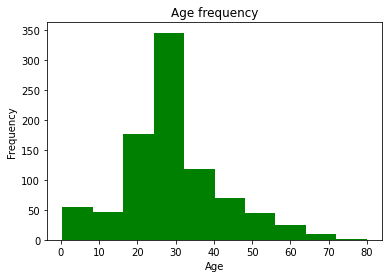

In [20]:
plt.title("Age frequency")
plt.xlabel("Age")
df['Age'].plot.hist(color = 'Green')
plt.show()

We can see that people with age between 25 and 32 have the highest frequency.

#### Survived distribution

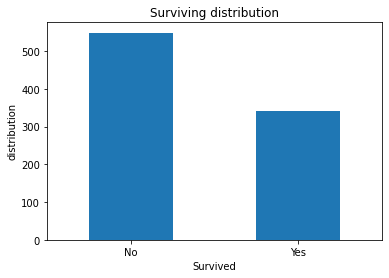

In [21]:
plt.xlabel("Survived")
plt.ylabel("distribution")
plt.title("Surviving distribution")
vc = df["Survived"].value_counts()
vc.plot.bar(rot = 0)
plt.show()

In [22]:
df["Survived"].value_counts()/df["Survived"].value_counts().sum()

No     0.616162
Yes    0.383838
Name: Survived, dtype: float64

More than 60 % of the passengers had died.

#### Embarked distribution

In [23]:
vc = df["Embarked"].value_counts()
vc / vc.sum()

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

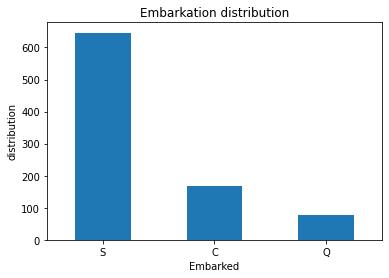

In [24]:
plt.xlabel("Embarked")
plt.ylabel("distribution")
plt.title("Embarkation distribution")
vc.plot.bar(rot = 0)
plt.show()

More than 70% of the passengers boarded from Southampton. Just 18% boarded from Cherbourg and the rest boarded from Queenstown.

#### Survived based on Pclass

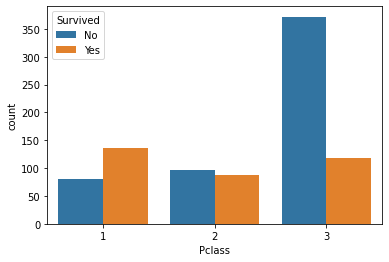

In [25]:
sns.countplot(data = df, x = 'Pclass', hue = 'Survived')
plt.show()

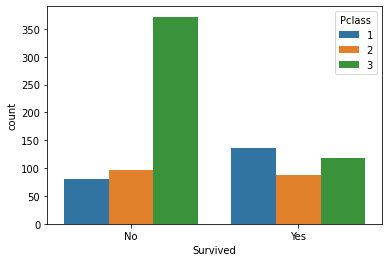

In [26]:
sns.countplot(data = df, hue = 'Pclass', x = 'Survived')
plt.show()

- The number of passengers in the third class was more than the number of passengers in the first and second class.
- The survival chances of a First class passenger is higher than a Second or Third class passenger.
- We can see that the passengers of the third class have a high probability to die.

### Visualizing the correlation between Sex and Age

In [27]:
# Calculating the average of Age for females and males
df[["Sex","Age"]].groupby("Sex").mean()

,Age
Sex,
female,28.216730
male,30.505824


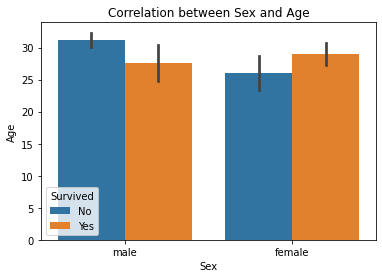

In [28]:
plt.title("Correlation between Sex and Age")
sns.barplot(data = df, x = "Sex", y = "Age", hue = "Survived")
plt.show()

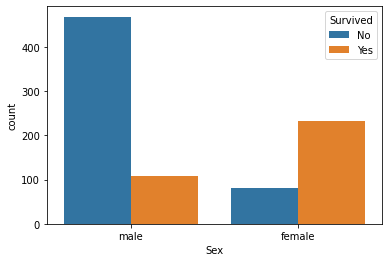

In [29]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived')
plt.show()

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


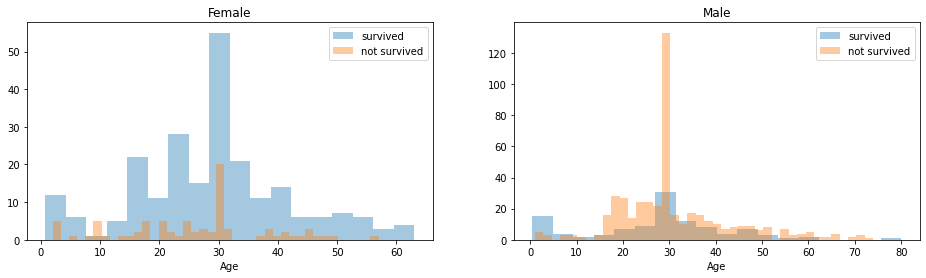

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 4))
female = df[df['Sex']=='female']
male = df[df['Sex']=='male']
ax = sns.distplot(female[female['Survived']=="Yes"].Age, bins = 18, label = "survived", ax = axes[0], kde = False)
ax = sns.distplot(female[female['Survived']=="No"].Age, bins = 40, label = "not survived", ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(male[male['Survived']=="Yes"].Age, bins = 18, label = "survived", ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']=="No"].Age, bins = 40, label = "not survived", ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

We can see that the fact that we replaced the missing values in the age by the mean value ( = 29.7 ) has an influence on the quality of this plot. Which means that we must first visualize the data before processing the missing values.

In [31]:
df2 = pd.read_csv("titanic-passengers.csv",sep = ";")

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


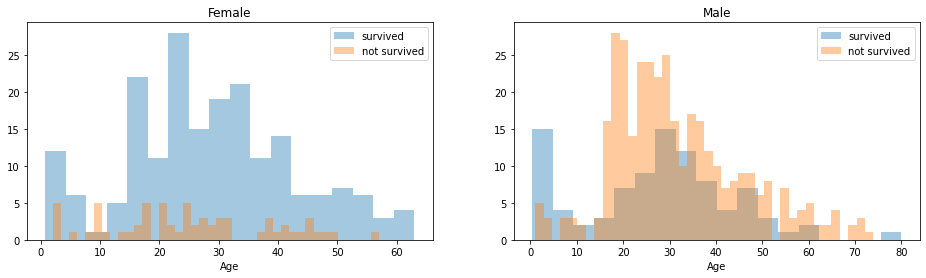

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 4))
female = df2[df2['Sex']=='female']
male = df2[df2['Sex']=='male']
ax = sns.distplot(female[female['Survived']=="Yes"].Age.dropna(), bins = 18, label = "survived", ax = axes[0], kde = False)
ax = sns.distplot(female[female['Survived']=="No"].Age.dropna(), bins = 40, label = "not survived", ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(male[male['Survived']=="Yes"].Age.dropna(), bins = 18, label = "survived", ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']=="No"].Age.dropna(), bins = 40, label = "not survived", ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

- We can see that men have a high probability of survival when they are between 18 and 40 years old. For women the survival chances are higher between 15 and 42.

- Children have a higher probability of survival.

- It seems that we will need to create age groups later on.

### Pick two other features and study their impact on the survival of the individuals

#### Embarked, Pclass and Sex:

In [33]:
# We need to convert Survived to numerical format ("Yes" or "No" to 1 or 0)
survived_encoding = {"Survived" : {"Yes":1,"No":0}}
df.replace(survived_encoding, inplace = True)

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


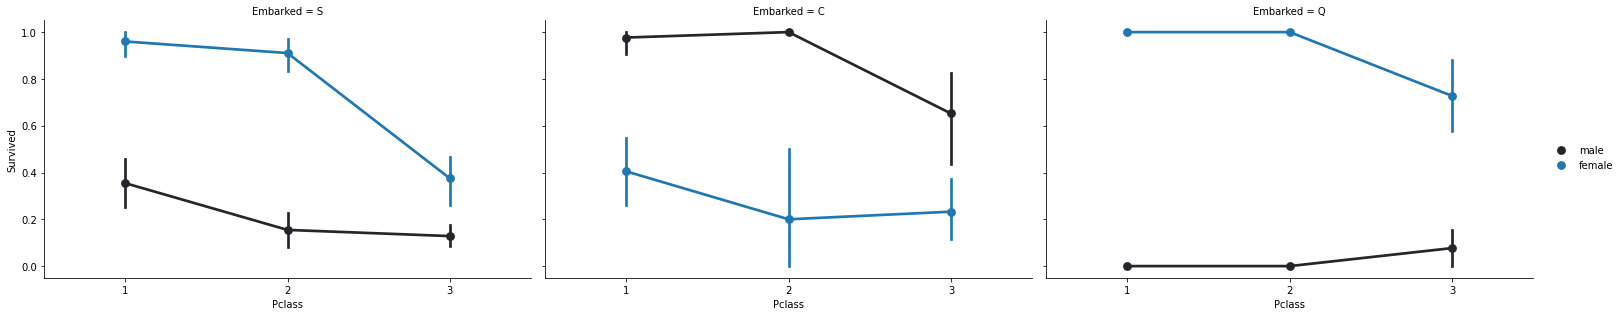

In [34]:
grid = sns.FacetGrid(df, col = 'Embarked', size = 4.5, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None)
grid.add_legend()
plt.show()

- Embarked seems to be correlated with survival, depending on the gender.

- Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C.

- Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

- Pclass also seems to be correlated with survival.

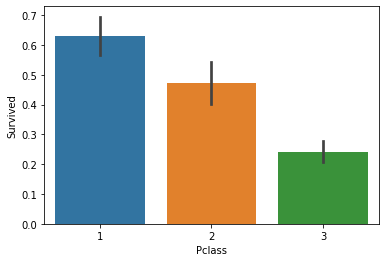

In [35]:
sns.barplot(data = df, x = "Pclass", y = "Survived")
plt.show()

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


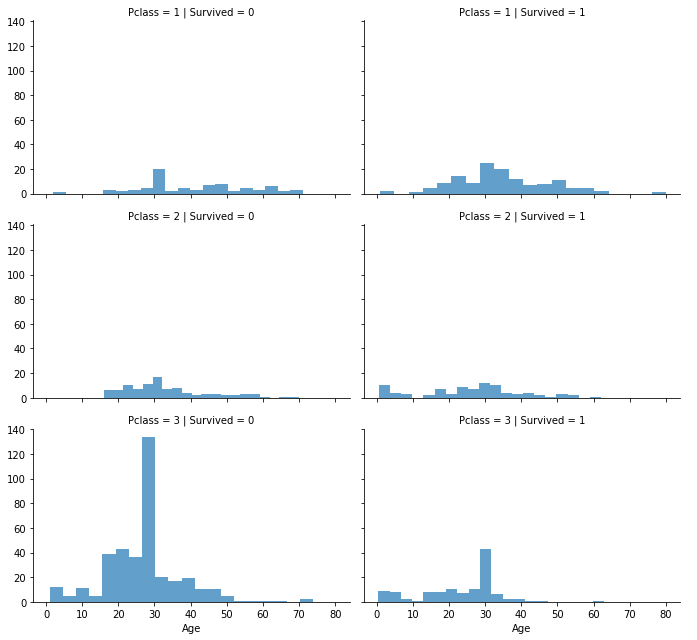

In [36]:
grid = sns.FacetGrid(df, col = "Survived", row = "Pclass", size = 3, aspect = 1.6)
grid.map(plt.hist, "Age", alpha = .7, bins = 20)
grid.add_legend()
plt.show()

The plot above confirms our assumption about Pclass 1, but we can also spot a high probability that a person in Pclass 3 will not survive.

## Plot correlation map

In [37]:
def plot_correlation_map(df):
    corr = df.corr()
    s ,ax = plt.subplots(figsize = (12,10))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    s = sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink":.9}, ax=ax, annot=True, annot_kws={'fontsize':12})

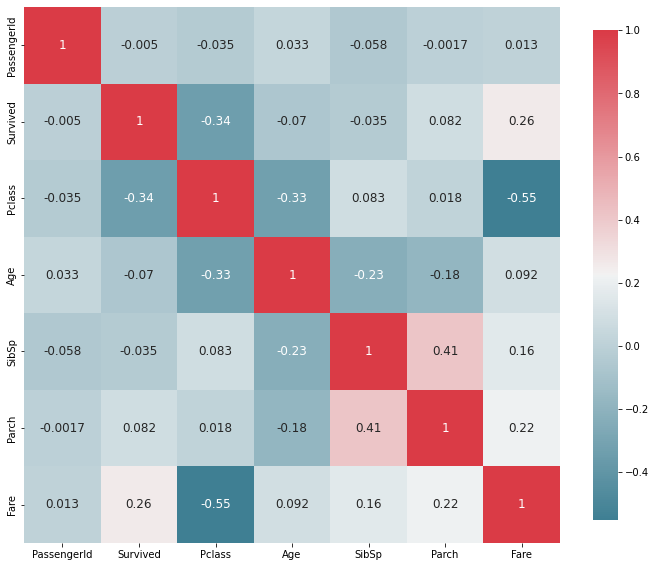

In [38]:
plot_correlation_map(df)

The plot_correlation_map function show the correlation between our dataset columns using the .corr() method of pandas DataFrame and functions from Seaborn : diverging_palette and heatmap.

In [39]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Drop the useless columns

To me, it would make sense if everything except 'PassengerId', 'Ticket' and 'Name' would be correlated with a high survival rate.

In [40]:
new_df = df.drop(["PassengerId","Ticket","Name"], axis = 1)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,male,28.0,0,0,13.0000,G6,S
1,0,3,male,25.0,0,0,7.6500,F G73,S
2,0,3,male,20.0,0,0,7.8542,G6,S
3,0,3,female,29.0,0,4,21.0750,G6,S
4,0,1,male,31.0,1,0,52.0000,B71,S


### Create a new column called "Title" which contains the appropriate title for each individual
Extract the title from the column "Name".

In [41]:
new_df = df.drop(["PassengerId","Ticket"], axis = 1)
new_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,G6,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,G6,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,G6,S
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,B71,S


In [42]:
new_df['Title'] = new_df['Name'].str.split(',|\\.',expand = True)[1] 
new_df['Title'] = new_df['Title'].str.strip()
new_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

### Visualize the correlation between Title and other features

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


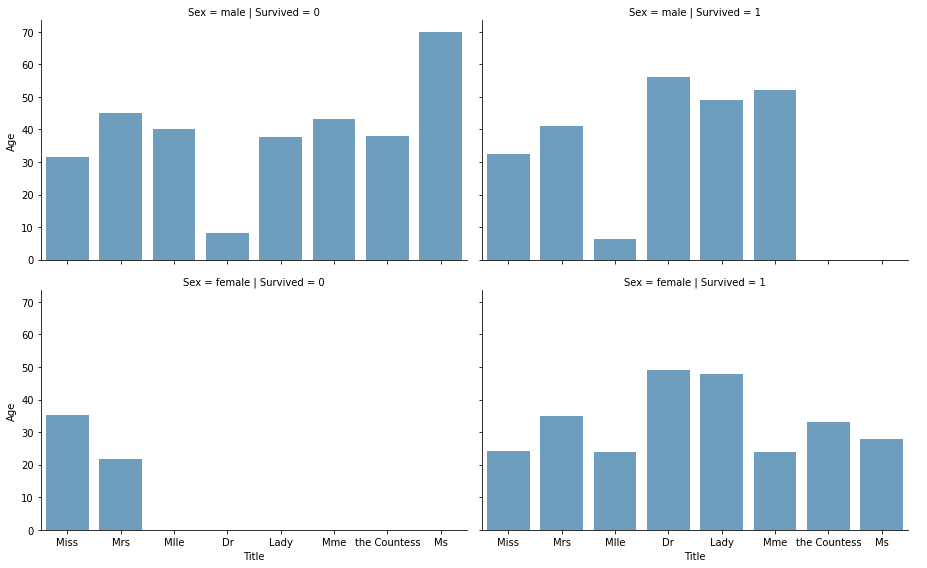

In [43]:
grid = sns.FacetGrid(new_df, row = "Sex", col = "Survived", height = 4, aspect = 1.6)
grid.map(sns.barplot, "Title", "Age", alpha = .7, ci = None)
grid.add_legend()
plt.show()

We can see that there are a lot of titles which makes the feature very impractical. Let's try to group these titles into more useful ones.

In [44]:
Title_Dictionary = {"Capt": "Officer",
                    "Col": "Officer",
                    "Major": "Officer",
                    "Dr": "Officer",
                    "Rev": "Officer",
                    "Jonkheer": "Royalty",
                    "Don": "Royalty",
                    "Sir": "Royalty",
                    "Lady": "Royalty",
                    "the Countess": "Royalty",
                    "Dona": "Royalty",
                    "Mme": "Miss",
                    "Mlle": "Miss",
                    "Miss": "Miss",
                    "Ms": "Mrs",
                    "Mr": "Mrs",
                    "Mrs":"Mrs",
                    "Master": "Master"
                    }

In [45]:
new_df["Title"] = new_df["Title"].map(Title_Dictionary)
new_df["Title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

### Let's visualize the same correlations using these new titles now.

C:\Users\lenov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


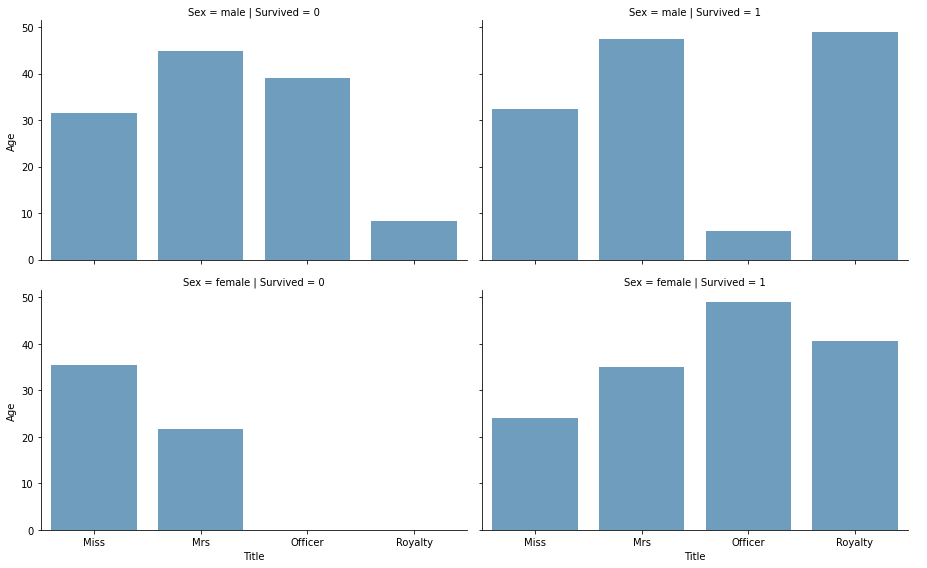

In [46]:
grid = sns.FacetGrid(new_df, row = "Sex", col = "Survived", height = 4, aspect = 1.6)
grid.map(sns.barplot, "Title", "Age", alpha = .7, ci = None)
grid.add_legend()
plt.show()

<AxesSubplot:xlabel='Title'>

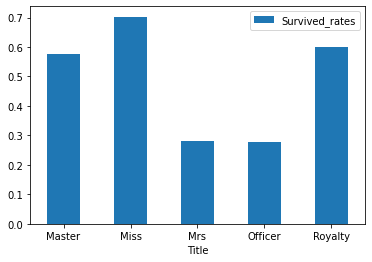

In [47]:
new_df.groupby(by = "Title").agg(Survived_rates = ("Survived","mean")).plot(kind = 'bar', rot = 0)

### Using the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Let's add the "Parch" and "SibSp" values and store the result in the new column "FamilySize"

<AxesSubplot:xlabel='FamilySize'>

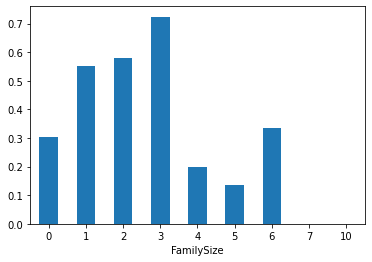

In [48]:
new_df["FamilySize"] = new_df["Parch"] + new_df["SibSp"]
new_df['Survived'].groupby(new_df['FamilySize']).mean().plot(kind = 'bar', rot = 0)

FamilySize has a real impact when we talk about the chance of survive because they looked for each other.